In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
day_price_1_df = pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_1.csv", delimiter=";")
day_price_0_df = pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_0.csv", delimiter=";")
day_price_m1_df = pd.read_csv("./round-2-island-data-bottle/prices_round_2_day_-1.csv", delimiter=";")

day_trades_1_df = pd.read_csv("./round-2-island-data-bottle/trades_round_2_day_1.csv", delimiter=";")
day_trades_0_df = pd.read_csv("./round-2-island-data-bottle/trades_round_2_day_0.csv", delimiter=";")
day_trades_m1_df = pd.read_csv("./round-2-island-data-bottle/trades_round_2_day_-1.csv", delimiter=";")

# merge all the dataframes
price_merged_df = pd.concat([day_price_m1_df, day_price_0_df, day_price_1_df])
trade_merged_df = pd.concat([day_trades_m1_df, day_trades_0_df, day_trades_1_df])

# price df for each product
croissants_df = price_merged_df[price_merged_df['product'] == 'CROISSANTS'].copy()
jams_df = price_merged_df[price_merged_df['product'] == 'JAMS'].copy()
djembe_df = price_merged_df[price_merged_df['product'] == 'DJEMBES'].copy()
pic1_df = price_merged_df[price_merged_df['product'] == 'PICNIC_BASKET1'].copy()
pic2_df = price_merged_df[price_merged_df['product'] == 'PICNIC_BASKET2'].copy()

# trade df for each product
croissants_trades_df = trade_merged_df[trade_merged_df['symbol'] == 'CROISSANTS'].copy()
jams_trades_df = trade_merged_df[trade_merged_df['symbol'] == 'JAMS'].copy()
djembe_trades_df = trade_merged_df[trade_merged_df['symbol'] == 'DJEMBES'].copy()
pic1_trades_df = trade_merged_df[trade_merged_df['symbol'] == 'PICNIC_BASKET1'].copy()
pic2_trades_df = trade_merged_df[trade_merged_df['symbol'] == 'PICNIC_BASKET2'].copy()

# Reset index for all DataFrames
croissants_df = croissants_df.reset_index(drop=True)
jams_df = jams_df.reset_index(drop=True)
djembe_df = djembe_df.reset_index(drop=True)
pic1_df = pic1_df.reset_index(drop=True)
pic2_df = pic2_df.reset_index(drop=True)

croissants_trades_df = croissants_trades_df.reset_index(drop=True)
jams_trades_df = jams_trades_df.reset_index(drop=True)
djembe_trades_df = djembe_trades_df.reset_index(drop=True)
pic1_trades_df = pic1_trades_df.reset_index(drop=True)
pic2_trades_df = pic2_trades_df.reset_index(drop=True)

In [52]:
djembe_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,DJEMBES,13450,55,NaN,NaN,NaN,NaN,13451,55,NaN,NaN,NaN,NaN,13450.5,0.0
1,-1,100,DJEMBES,13449,57,NaN,NaN,NaN,NaN,13451,57,NaN,NaN,NaN,NaN,13450.0,0.0
2,-1,200,DJEMBES,13450,20,13449.0,31.0,NaN,NaN,13451,51,NaN,NaN,NaN,NaN,13450.5,0.0
3,-1,300,DJEMBES,13449,73,NaN,NaN,NaN,NaN,13451,73,NaN,NaN,NaN,NaN,13450.0,0.0
4,-1,400,DJEMBES,13452,78,NaN,NaN,NaN,NaN,13453,78,NaN,NaN,NaN,NaN,13452.5,0.0


# UTILS

In [53]:
# Calculate VWAP for each row
def calculate_vwap(row):
    bid_value = sum(
        row[f"bid_price_{i}"] * row[f"bid_volume_{i}"]
        for i in range(1, 4)
        if not (pd.isna(row[f"bid_price_{i}"]) or pd.isna(row[f"bid_volume_{i}"]))
    )
    
    ask_value = sum(
        row[f"ask_price_{i}"] * row[f"ask_volume_{i}"]
        for i in range(1, 4)
        if not (pd.isna(row[f"ask_price_{i}"]) or pd.isna(row[f"ask_volume_{i}"]))
    )
    
    total_volume = sum(
        row[f"{side}_volume_{i}"]
        for side in ["bid", "ask"]
        for i in range(1, 4)
        if not (pd.isna(row[f"{side}_price_{i}"]) or pd.isna(row[f"{side}_volume_{i}"]))
    )
    
    return (bid_value + ask_value) / total_volume if total_volume > 0 else None

# Calculate mid price
def calculate_mid_price(row):
    return (row['ask_price_1'] + row['bid_price_1']) / 2

def calculate_spread(row):
    return row['ask_price_1'] - row['bid_price_1']

# define function to plot volatitlity
def calculate_volatility(data, window_size=20):
    # Calculate log returns
    log_returns = np.log(data['vwap']).diff()
    
    # Calculate rolling standard deviation of log returns
    volatility = log_returns.rolling(window=window_size).std()

    return volatility

# for each of the products across all the days, calculate the VWAP, mid price and spread
croissants_df['vwap'] = croissants_df.apply(calculate_vwap, axis=1)
croissants_df['mid_price'] = croissants_df.apply(calculate_mid_price, axis=1)
croissants_df['spread'] = croissants_df.apply(calculate_spread, axis=1)
jams_df['vwap'] = jams_df.apply(calculate_vwap, axis=1)
jams_df['mid_price'] = jams_df.apply(calculate_mid_price, axis=1)
jams_df['spread'] = jams_df.apply(calculate_spread, axis=1)
djembe_df['vwap'] = djembe_df.apply(calculate_vwap, axis=1)
djembe_df['mid_price'] = djembe_df.apply(calculate_mid_price, axis=1)
djembe_df['spread'] = djembe_df.apply(calculate_spread, axis=1)
pic1_df['vwap'] = pic1_df.apply(calculate_vwap, axis=1)
pic1_df['mid_price'] = pic1_df.apply(calculate_mid_price, axis=1)
pic1_df['spread'] = pic1_df.apply(calculate_spread, axis=1)
pic2_df['vwap'] = pic2_df.apply(calculate_vwap, axis=1)
pic2_df['mid_price'] = pic2_df.apply(calculate_mid_price, axis=1)
pic2_df['spread'] = pic2_df.apply(calculate_spread, axis=1)

In [54]:
pic1_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap,spread
0,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0,59289.236842,10
1,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,NaN,NaN,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0,59287.472973,10
2,-1,200,PICNIC_BASKET1,59288,13,59287.0,20.0,NaN,NaN,59299,13,59300.0,20.0,NaN,NaN,59293.5,0.0,59293.500000,11
3,-1,300,PICNIC_BASKET1,59289,2,59288.0,17.0,59287.0,24.0,59298,2,59299.0,17.0,59300.0,24.0,59293.5,0.0,59293.500000,9
4,-1,400,PICNIC_BASKET1,59290,2,59289.0,15.0,59288.0,28.0,59294,6,59299.0,2.0,59300.0,15.0,59292.0,0.0,59291.779412,4


# PICNIC BASKET 1

1. Six (6) `CROISSANTS`
2. Three (3) `JAMS`
3. One (1) `DJEMBE`

In [61]:
# manual sum of vwap of indivual products in the basket

pic1_df["man_vwap"] = 6 * croissants_df["vwap"] + 2 * jams_df["vwap"] + 1 * djembe_df["vwap"]

In [63]:
croissants_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap,spread


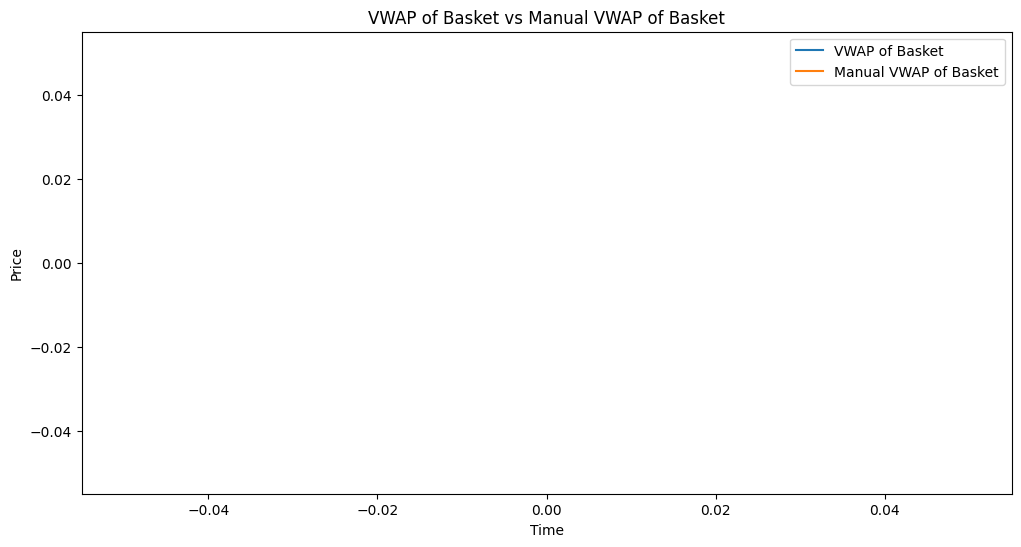

In [13]:
# plot man vwap and vwap of the basket
plt.figure(figsize=(12, 6))
plt.plot(pic1_df["vwap"], label="VWAP of Basket")
plt.plot(pic1_df["man_vwap"], label="Manual VWAP of Basket")
plt.title("VWAP of Basket vs Manual VWAP of Basket")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# PICNIC BASKET 2

1. Four (4) `CROISSANTS`
2. Two (2) `JAMS`

# CROISSANTS

# JAM

# DJEMBE